In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('PortoPortugal_50_sin_nulos.csv')
print(df.head())

   Unnamed: 0         id     scrape_id last_scraped       source   host_id  \
0           0   208147.0  2.020000e+13     15/12/24  city scrape   1024383   
1           1   241573.0  2.020000e+13     15/12/24  city scrape   1266562   
2           2  3902889.0  2.020000e+13     15/12/24  city scrape   4656501   
3           3  3907554.0  2.020000e+13     15/12/24  city scrape   3367367   
4           4  7918261.0  2.020000e+13     15/12/24  city scrape  40592098   

  host_since host_response_time host_response_rate host_acceptance_rate  ...  \
0   26/08/11     within an hour               100%                 100%  ...   
1   09/10/11     within an hour               100%                 100%  ...   
2   10/01/13     within an hour               100%                 100%  ...   
3   25/08/12     within an hour               100%                 100%  ...   
4   05/08/15     within an hour               100%                  69%  ...   

  review_scores_communication  review_scores_locat

**1. Aplicar método (Rango Intercuartílico) para eliminar Outliers del dataframe**

In [5]:
# Columnas numéricas que analizaremos
columnas_numericas = ['price', 'number_of_reviews', 'review_scores_rating', 
                     'accommodates', 'bathrooms', 'bedrooms', 'beds']

# Limpié la columna 'price' (elimine el símbolo $ y converti a float)
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

print(df['price'].head())

0    40.0
1    94.0
2    80.0
3    45.0
4    64.0
Name: price, dtype: float64


In [6]:
def eliminar_outliers_iqr(df, column_name):
    
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtrado = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
        
    outliers_eliminados = len(df) - len(df_filtrado)
    print(f"Outliers eliminados en {column_name}: {outliers_eliminados}")
    
    return df_filtrado


In [7]:
# Aplicar la eliminación de outliers a cada columna numérica
for columna in columnas_numericas:
    if columna in df.columns:
        df = eliminar_outliers_iqr(df, columna)
    else:
        print(f"La columna {columna} no existe")

Outliers eliminados en price: 2712
Outliers eliminados en number_of_reviews: 880
Outliers eliminados en review_scores_rating: 1450
Outliers eliminados en accommodates: 262
Outliers eliminados en bathrooms: 1853
Outliers eliminados en bedrooms: 2332
Outliers eliminados en beds: 72


In [8]:
# Información del DataFrame después de eliminar outliers
print("\nInformación del DataFrame después de eliminar outliers:")
print(f"Número de filas original: {len(pd.read_csv('PortoPortugal_50_sin_nulos.csv'))}")
print(f"Número de filas después de eliminar outliers: {len(df)}")

# Estadísticas descriptivas después de eliminar outliers
print("\nEstadísticas descriptivas después de eliminar outliers:")
print(df[columnas_numericas].describe())


Información del DataFrame después de eliminar outliers:
Número de filas original: 14432
Número de filas después de eliminar outliers: 4871

Estadísticas descriptivas después de eliminar outliers:
             price  number_of_reviews  review_scores_rating  accommodates  \
count  4871.000000        4871.000000           4871.000000   4871.000000   
mean     61.033874          56.614863              4.767097      2.727982   
std      25.280534          59.148360              0.197632      0.945168   
min      12.000000           1.000000              4.140000      1.000000   
25%      43.000000          10.000000              4.660000      2.000000   
50%      56.000000          34.000000              4.800000      2.000000   
75%      73.000000          87.000000              4.930000      4.000000   
max     161.000000         238.000000              5.000000      6.000000   

       bathrooms  bedrooms         beds  
count     4871.0    4871.0  4871.000000  
mean         1.0       1.

In [9]:
print(df.columns)

Index(['Unnamed: 0', 'id', 'scrape_id', 'last_scraped', 'source', 'host_id',
       'host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms',
       'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
       'calculated_host_listings_count',
       'calcul

**2. Extraer características a partir de aplicar un análisis univariado, a diferentes variables categóricas (15). Mostrar los resultados obtenidos ,mediante gráficas y tablas**

In [10]:
def analisis_univariado(df, columna, top_n=10):
    
    # Calcular frecuencias
    conteo = df[columna].value_counts().head(top_n)
    porcentaje = df[columna].value_counts(normalize=True).head(top_n) * 100
    
    # Tabla de resumen
    resumen = pd.DataFrame({
        'Conteo': conteo,
        'Porcentaje (%)': porcentaje.round(2)
    })
    
    print(f"\nAnálisis univariado para: {columna}")
    print(resumen)

     # Gráfico de barras
    plt.subplot(1, 2, 1)
    sns.countplot(y=columna, data=df, order=conteo.index)
    plt.title(f'Distribución de {columna}')
    plt.xlabel('Conteo')
    plt.ylabel(columna)


    plt.tight_layout()
    plt.show()


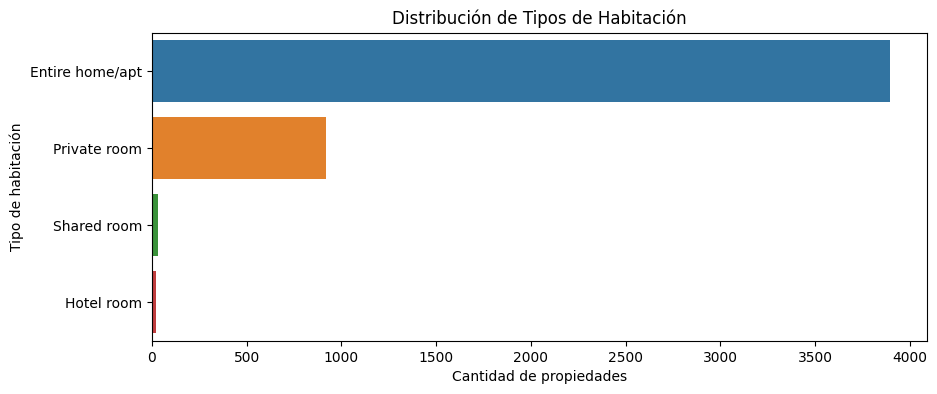

In [11]:
plt.figure(figsize=(10, 4))
sns.countplot(y='room_type', data=df, order=df['room_type'].value_counts().index)
plt.title('Distribución de Tipos de Habitación')
plt.xlabel('Cantidad de propiedades')
plt.ylabel('Tipo de habitación')
plt.show()

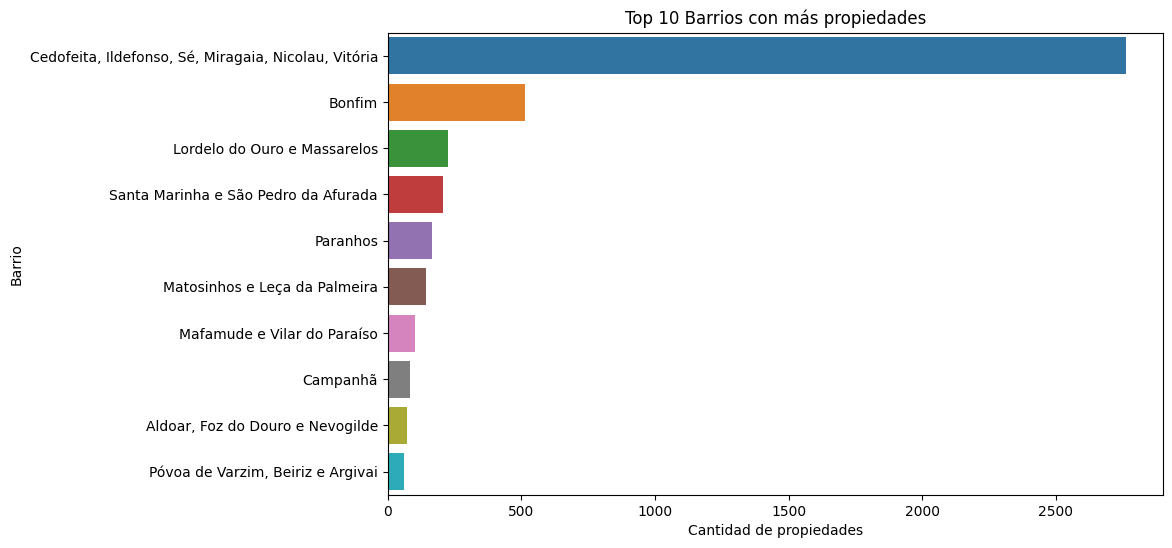

In [12]:
top_neighbourhoods = df['neighbourhood_cleansed'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_neighbourhoods.values, y=top_neighbourhoods.index)
plt.title('Top 10 Barrios con más propiedades')
plt.xlabel('Cantidad de propiedades')
plt.ylabel('Barrio')
plt.show()

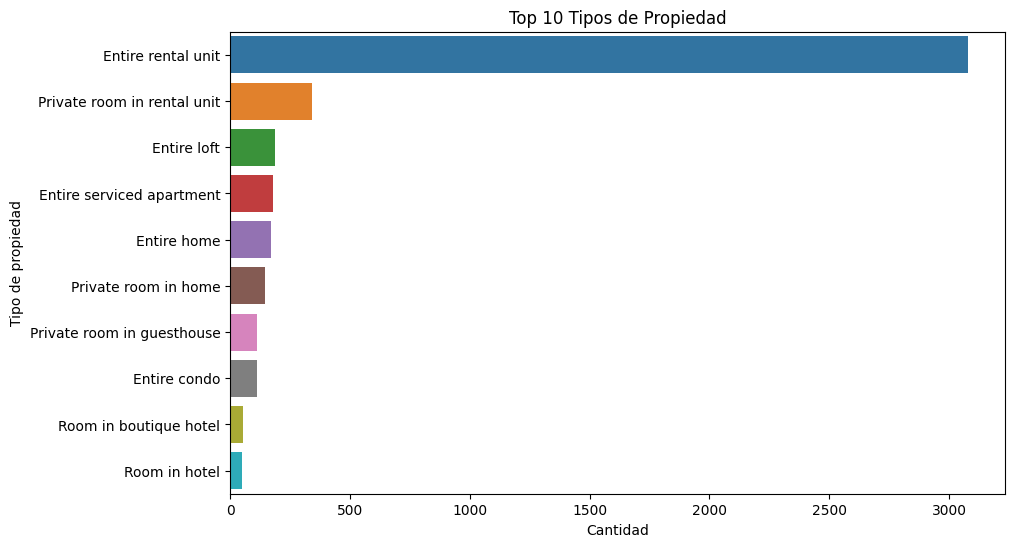

In [13]:
top_properties = df['property_type'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_properties.values, y=top_properties.index)
plt.title('Top 10 Tipos de Propiedad')
plt.xlabel('Cantidad')
plt.ylabel('Tipo de propiedad')
plt.show()

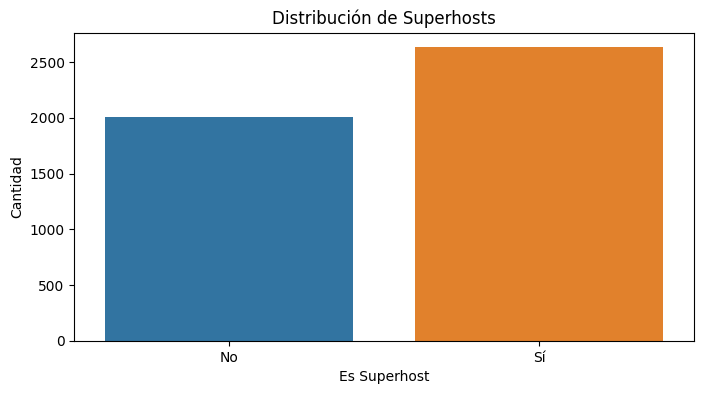

In [14]:
plt.figure(figsize=(8, 4))
sns.countplot(x='host_is_superhost', data=df)
plt.title('Distribución de Superhosts')
plt.xlabel('Es Superhost')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

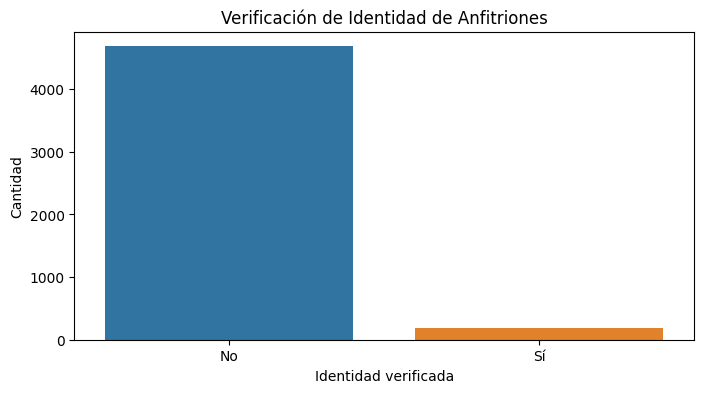

In [34]:
plt.figure(figsize=(8, 4))
sns.countplot(x='host_identity_verified', data=df)
plt.title('Verificación de Identidad de Anfitriones')
plt.xlabel('Identidad verificada')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()


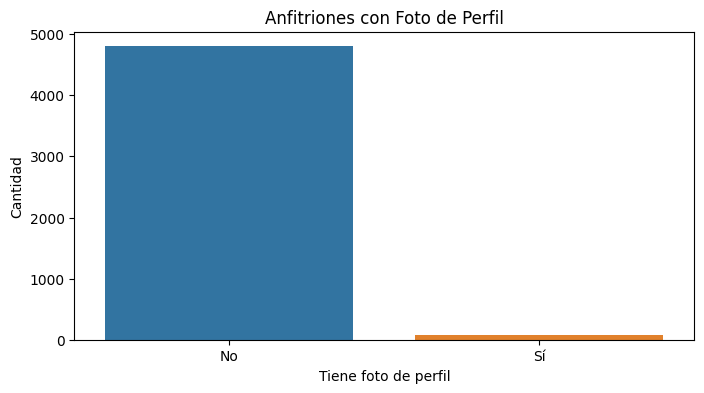

In [16]:
plt.figure(figsize=(8, 4))
sns.countplot(x='host_has_profile_pic', data=df)
plt.title('Anfitriones con Foto de Perfil')
plt.xlabel('Tiene foto de perfil')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

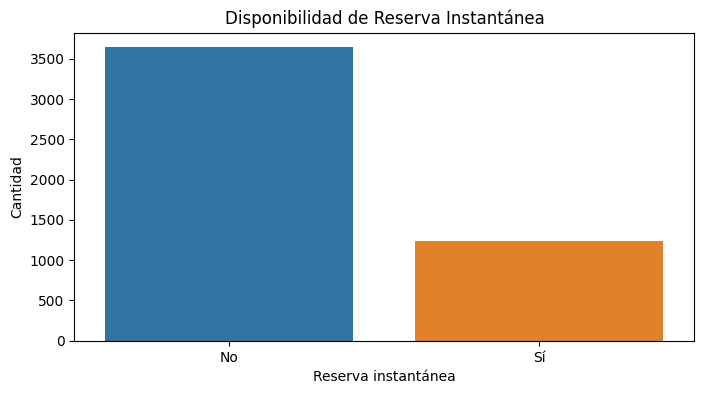

In [17]:
plt.figure(figsize=(8, 4))
sns.countplot(x='instant_bookable', data=df)
plt.title('Disponibilidad de Reserva Instantánea')
plt.xlabel('Reserva instantánea')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

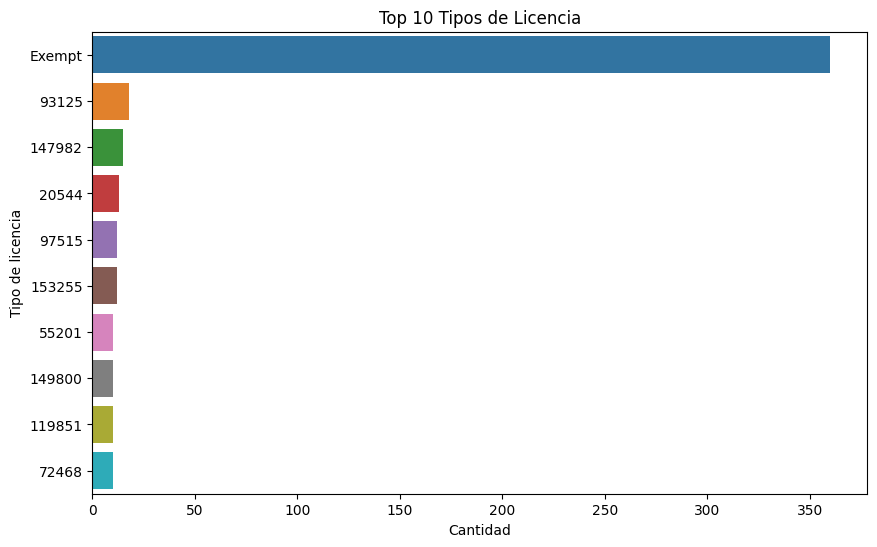

In [18]:
df['license_type'] = df['license'].str.split('/').str[0]
license_counts = df['license_type'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=license_counts.values, y=license_counts.index)
plt.title('Top 10 Tipos de Licencia')
plt.xlabel('Cantidad')
plt.ylabel('Tipo de licencia')
plt.show()

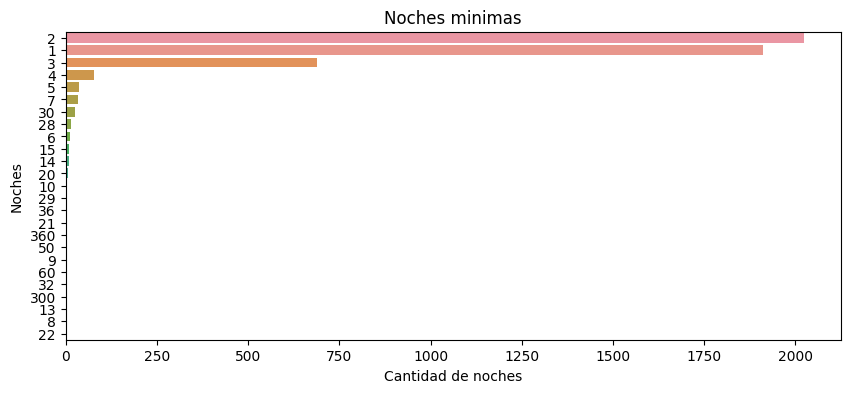

In [19]:
plt.figure(figsize=(10, 4))
sns.countplot(y='minimum_nights', data=df, 
              order=df['minimum_nights'].value_counts().index)
plt.title('Noches minimas')
plt.xlabel('Cantidad de noches')
plt.ylabel('Noches')
plt.show()

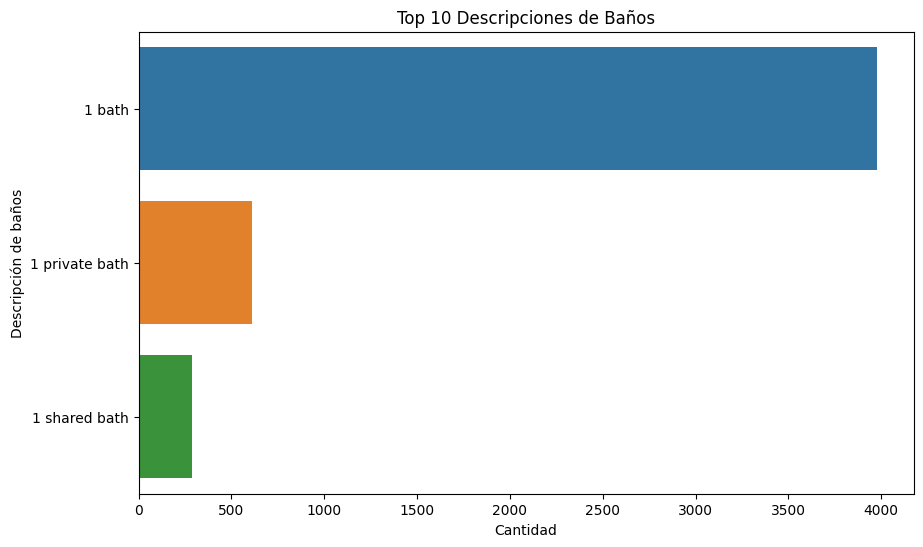

In [20]:
top_bathrooms = df['bathrooms_text'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_bathrooms.values, y=top_bathrooms.index)
plt.title('Top 10 Descripciones de Baños')
plt.xlabel('Cantidad')
plt.ylabel('Descripción de baños')
plt.show()

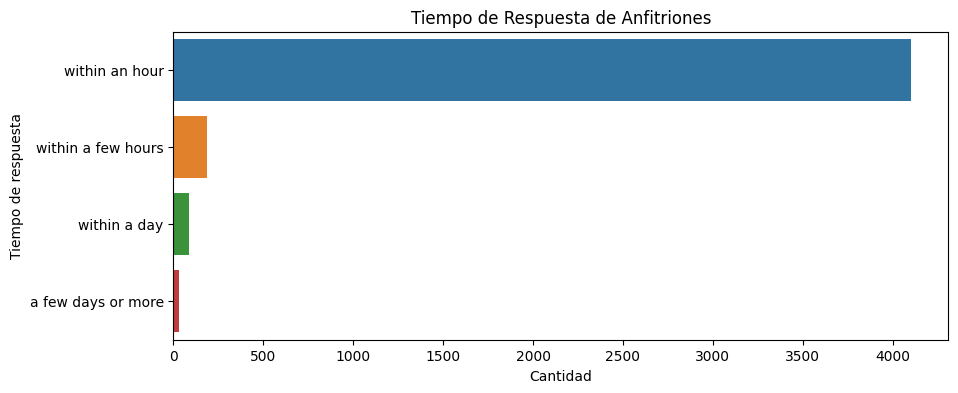

In [21]:
plt.figure(figsize=(10, 4))
sns.countplot(y='host_response_time', data=df, 
              order=df['host_response_time'].value_counts().index)
plt.title('Tiempo de Respuesta de Anfitriones')
plt.xlabel('Cantidad')
plt.ylabel('Tiempo de respuesta')
plt.show()

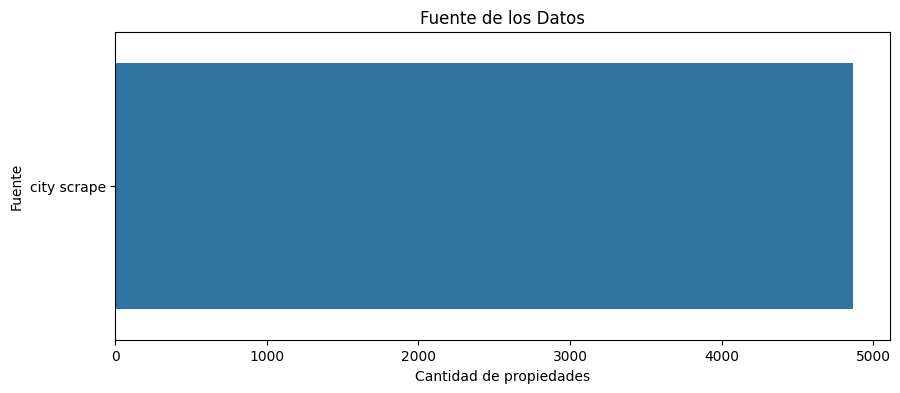

In [22]:
plt.figure(figsize=(10, 4))
sns.countplot(y='source', data=df, order=df['source'].value_counts().index)
plt.title('Fuente de los Datos')
plt.xlabel('Cantidad de propiedades')
plt.ylabel('Fuente')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


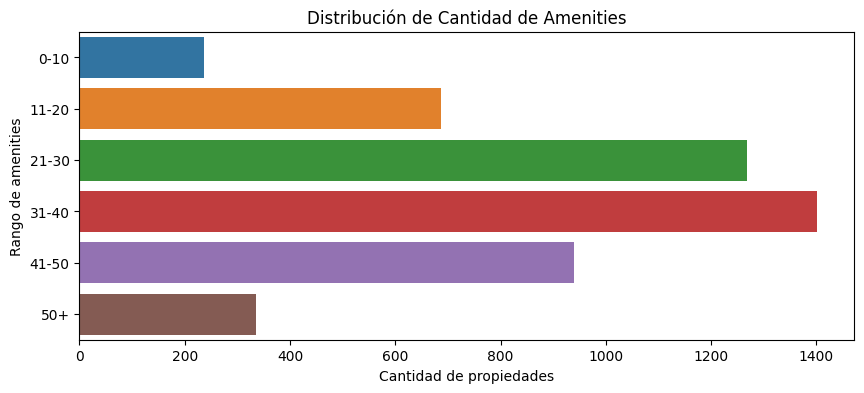

In [23]:
df['amenities_count'] = df['amenities'].apply(lambda x: len(eval(x)))
df['amenities_category'] = pd.cut(df['amenities_count'], 
                                 bins=[0, 10, 20, 30, 40, 50, 100],
                                 labels=['0-10', '11-20', '21-30', '31-40', '41-50', '50+'])

plt.figure(figsize=(10, 4))
sns.countplot(y='amenities_category', data=df, 
              order=['0-10', '11-20', '21-30', '31-40', '41-50', '50+'])
plt.title('Distribución de Cantidad de Amenities')
plt.xlabel('Cantidad de propiedades')
plt.ylabel('Rango de amenities')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


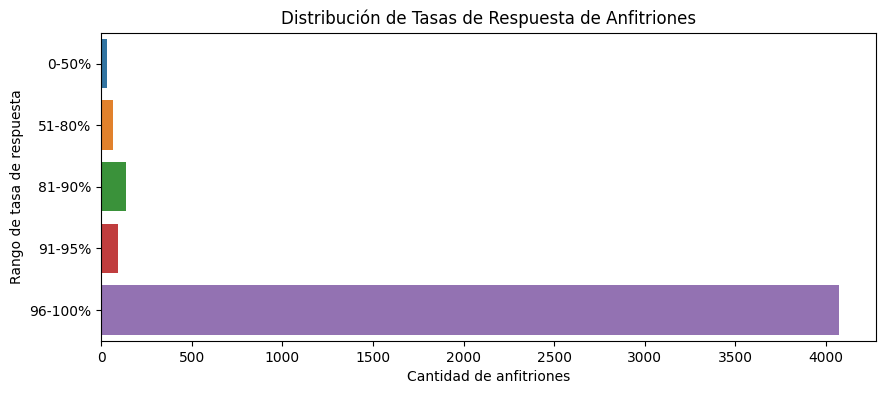

In [24]:
# Limpiar y convertir a numérico
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '').astype(float)

# Categorías
df['response_rate_category'] = pd.cut(df['host_response_rate'],
                                    bins=[0, 50, 80, 90, 95, 100],
                                    labels=['0-50%', '51-80%', '81-90%', '91-95%', '96-100%'])

plt.figure(figsize=(10, 4))
sns.countplot(y='response_rate_category', data=df,
             order=['0-50%', '51-80%', '81-90%', '91-95%', '96-100%'])
plt.title('Distribución de Tasas de Respuesta de Anfitriones')
plt.xlabel('Cantidad de anfitriones')
plt.ylabel('Rango de tasa de respuesta')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


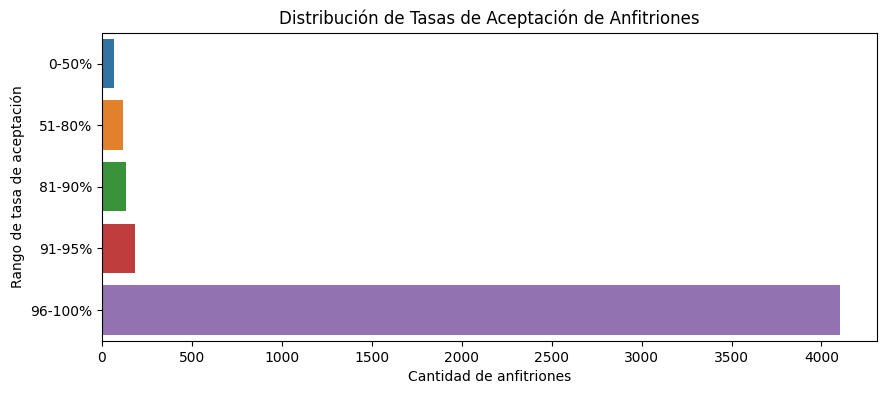

In [25]:
# Limpiar y convertir a numérico
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '').astype(float)

# Categorías
df['acceptance_rate_category'] = pd.cut(df['host_acceptance_rate'],
                                      bins=[0, 50, 80, 90, 95, 100],
                                      labels=['0-50%', '51-80%', '81-90%', '91-95%', '96-100%'])

plt.figure(figsize=(10, 4))
sns.countplot(y='acceptance_rate_category', data=df,
             order=['0-50%', '51-80%', '81-90%', '91-95%', '96-100%'])
plt.title('Distribución de Tasas de Aceptación de Anfitriones')
plt.xlabel('Cantidad de anfitriones')
plt.ylabel('Rango de tasa de aceptación')
plt.show()

**3. Categorizar las siguientes variables:**

In [26]:
print("Primeras 5 filas del dataset:")
print(df.head())

Primeras 5 filas del dataset:
    Unnamed: 0          id     scrape_id last_scraped       source    host_id  \
0            0    208147.0  2.020000e+13     15/12/24  city scrape    1024383   
8            8  20041901.0  2.020000e+13     15/12/24  city scrape  142281905   
12          12  23017582.0  2.020000e+13     15/12/24  city scrape  429054820   
13          13  23023720.0  2.020000e+13     15/12/24  city scrape  429054820   
16          16  25832595.0  2.020000e+13     15/12/24  city scrape   49819978   

   host_since host_response_time  host_response_rate  host_acceptance_rate  \
0    26/08/11     within an hour               100.0                 100.0   
8    24/07/17     within an hour               100.0                  86.0   
12   26/10/21                NaN                 NaN                   NaN   
13   26/10/21                NaN                 NaN                   NaN   
16   24/11/15     within an hour               100.0                 100.0   

    ... calcul

In [27]:
def convertir_porcentaje(columna):
    if columna.dtype == 'object':  # Solo si es tipo texto/objeto
        try:
            return pd.to_numeric(columna.str.replace('%', ''), errors='coerce') / 100
        except:
            return columna
    else:
        return columna  # Si ya es numérico, lo dejamos igual

In [28]:
if 'host_response_rate' in df.columns:
    df['host_response_rate'] = convertir_porcentaje(df['host_response_rate'])

if 'host_acceptance_rate' in df.columns:
    df['host_acceptance_rate'] = convertir_porcentaje(df['host_acceptance_rate'])


In [29]:
if 'bathrooms_text' in df.columns and df['bathrooms_text'].dtype == 'object':
    try:
        # Extraer número de baños (tomamos solo el primer número que aparezca)
        df['bathrooms'] = df['bathrooms_text'].str.extract('(\d+\.?\d*)').astype(float)
    except:
        print("No se pudo convertir 'bathrooms_text' a valores numéricos")

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
/var/folders/nm/538b56350957x8_x2f8xz2gc0000gn/T/ipykernel_1892/217861037.py:4: SyntaxWarning: invalid escape sequence '\d'
  df['bathrooms'] = df['bathrooms_text'].str.extract('(\d+\.?\d*)').astype(float)


In [30]:
variables = [
    "host_response_rate", "host_acceptance_rate", "host_total_listings_count",
    "accommodates", "beds", "price", "maximum_nights_avg_ntm",
    "availability_365", "number_of_reviews", "review_scores_value", 
    "reviews_per_month"
]

In [31]:
if 'bathrooms' in df.columns:
    variables.append('bathrooms')
elif 'bathrooms_text' in df.columns and df['bathrooms_text'].dtype != 'object':
    variables.append('bathrooms_text')

In [32]:
#  variables existentes en el dataset
variables_disponibles = [var for var in variables if var in df.columns]
print(variables_disponibles)

['host_response_rate', 'host_acceptance_rate', 'accommodates', 'beds', 'price', 'availability_365', 'number_of_reviews', 'review_scores_value', 'reviews_per_month', 'bathrooms']



Analizando variable: host_response_rate

Frecuencias para host_response_rate:
           var  freq  perc
0      0.0-7.7    18   0.4
1     7.7-15.4     0   0.0
2    15.4-23.1     8   0.2
3    23.1-30.8     0   0.0
4    30.8-38.5     1   0.0
5    38.5-46.2     5   0.1
6    46.2-53.8    15   0.3
7    53.8-61.5     4   0.1
8    61.5-69.2    25   0.6
9    69.2-76.9     8   0.2
10   76.9-84.6    45   1.0
11   84.6-92.3   175   4.0
12  92.3-100.0  4111  93.1


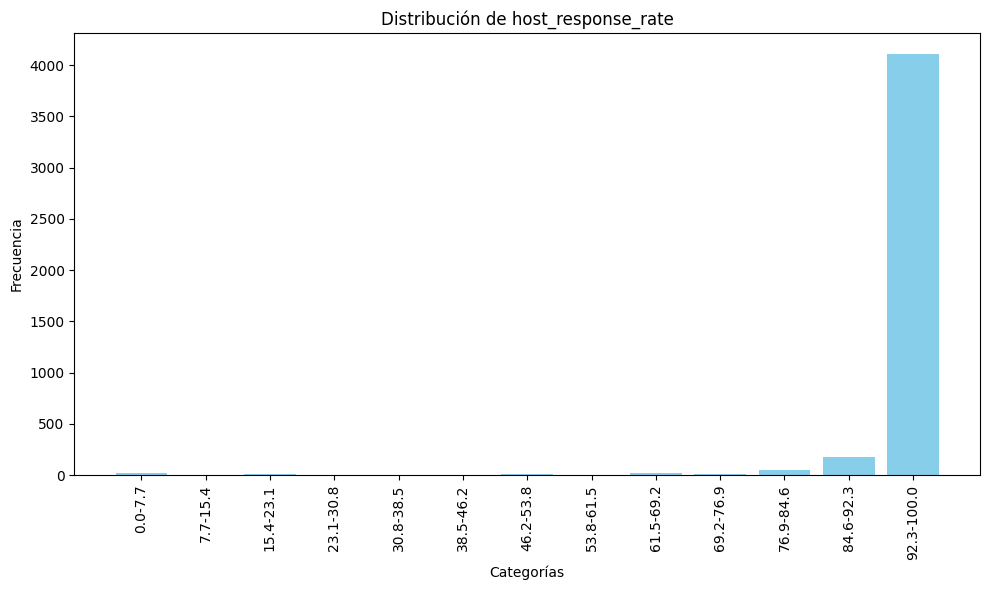

Gráfico creado para host_response_rate

Analizando variable: host_acceptance_rate

Frecuencias para host_acceptance_rate:
           var  freq  perc
0      0.0-7.7    38   0.8
1     7.7-15.4     9   0.2
2    15.4-23.1     2   0.0
3    23.1-30.8     6   0.1
4    30.8-38.5    13   0.3
5    38.5-46.2    22   0.5
6    46.2-53.8    17   0.4
7    53.8-61.5     8   0.2
8    61.5-69.2    41   0.9
9    69.2-76.9    35   0.8
10   76.9-84.6    64   1.4
11   84.6-92.3   151   3.3
12  92.3-100.0  4233  91.2


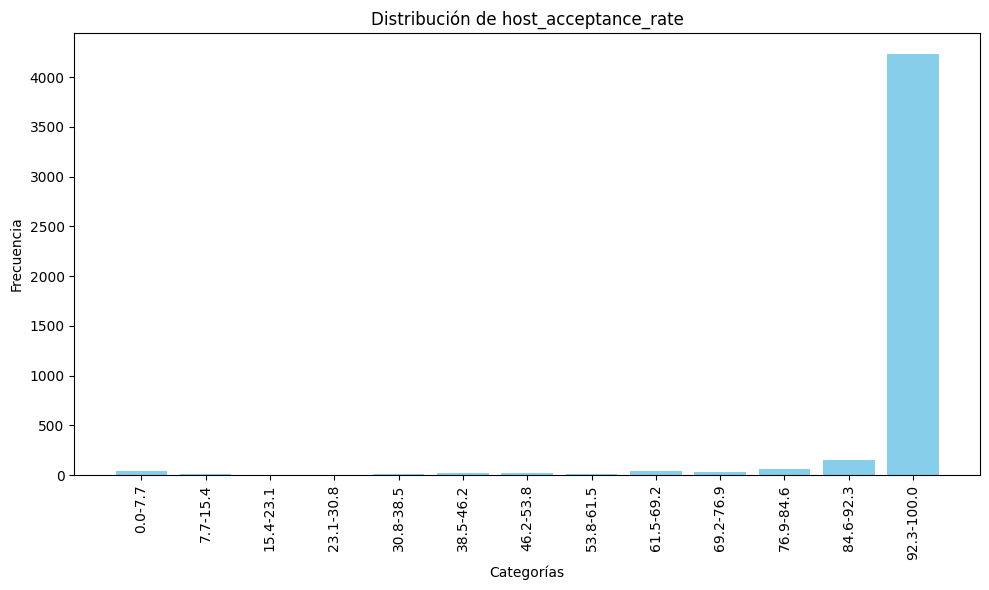

Gráfico creado para host_acceptance_rate

Analizando variable: accommodates

Frecuencias para accommodates:
        var  freq  perc
0   1.0-1.4   148   3.0
1   1.4-1.8     0   0.0
2   1.8-2.2  2483  51.0
3   2.2-2.5     0   0.0
4   2.5-2.9     0   0.0
5   2.9-3.3   860  17.7
6   3.3-3.7     0   0.0
7   3.7-4.1  1323  27.2
8   4.1-4.5     0   0.0
9   4.5-4.8     0   0.0
10  4.8-5.2    40   0.8
11  5.2-5.6     0   0.0
12  5.6-6.0    17   0.3


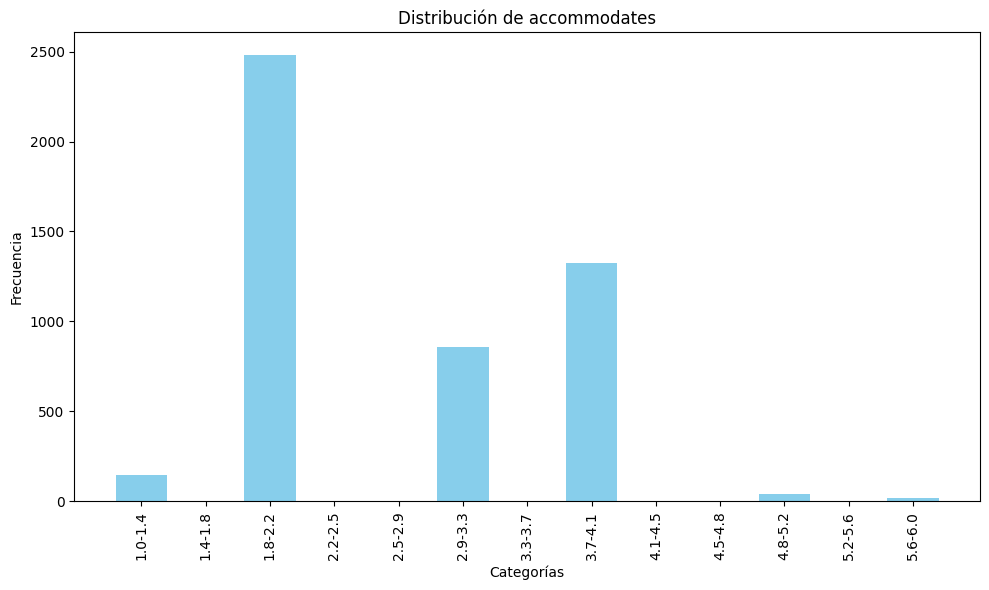

Gráfico creado para accommodates

Analizando variable: beds

Frecuencias para beds:
        var  freq  perc
0   0.0-0.2    36   0.7
1   0.2-0.5     0   0.0
2   0.5-0.7     0   0.0
3   0.7-0.9     0   0.0
4   0.9-1.2  2689  55.2
5   1.2-1.4     0   0.0
6   1.4-1.6     0   0.0
7   1.6-1.8     0   0.0
8   1.8-2.1  1888  38.8
9   2.1-2.3     0   0.0
10  2.3-2.5     0   0.0
11  2.5-2.8     0   0.0
12  2.8-3.0   258   5.3


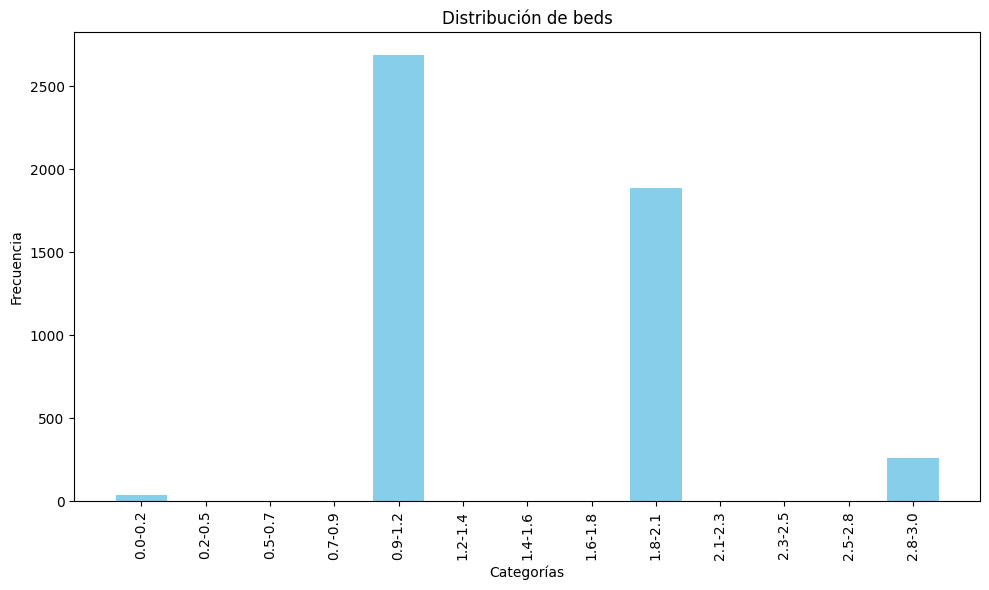

Gráfico creado para beds

Analizando variable: price

Frecuencias para price:
            var  freq  perc
0     12.0-23.5   100   2.1
1     23.5-34.9   398   8.2
2     34.9-46.4  1017  20.9
3     46.4-57.8  1008  20.7
4     57.8-69.3   910  18.7
5     69.3-80.8   603  12.4
6     80.8-92.2   299   6.1
7    92.2-103.7   200   4.1
8   103.7-115.2   124   2.5
9   115.2-126.6    86   1.8
10  126.6-138.1    55   1.1
11  138.1-149.5    29   0.6
12  149.5-161.0    42   0.9


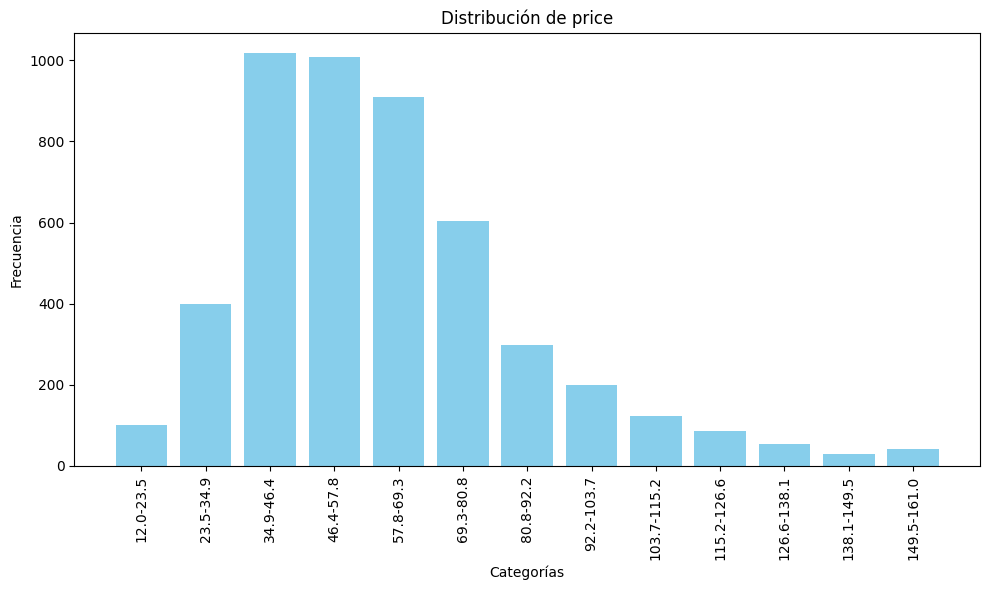

Gráfico creado para price

Analizando variable: availability_365

Frecuencias para availability_365:
            var  freq  perc
0      0.0-28.1   197   4.0
1     28.1-56.2   157   3.2
2     56.2-84.2   213   4.4
3    84.2-112.3   216   4.4
4   112.3-140.4    94   1.9
5   140.4-168.5   215   4.4
6   168.5-196.5   226   4.6
7   196.5-224.6   116   2.4
8   224.6-252.7   260   5.3
9   252.7-280.8   432   8.9
10  280.8-308.8   317   6.5
11  308.8-336.9   648  13.3
12  336.9-365.0  1780  36.5


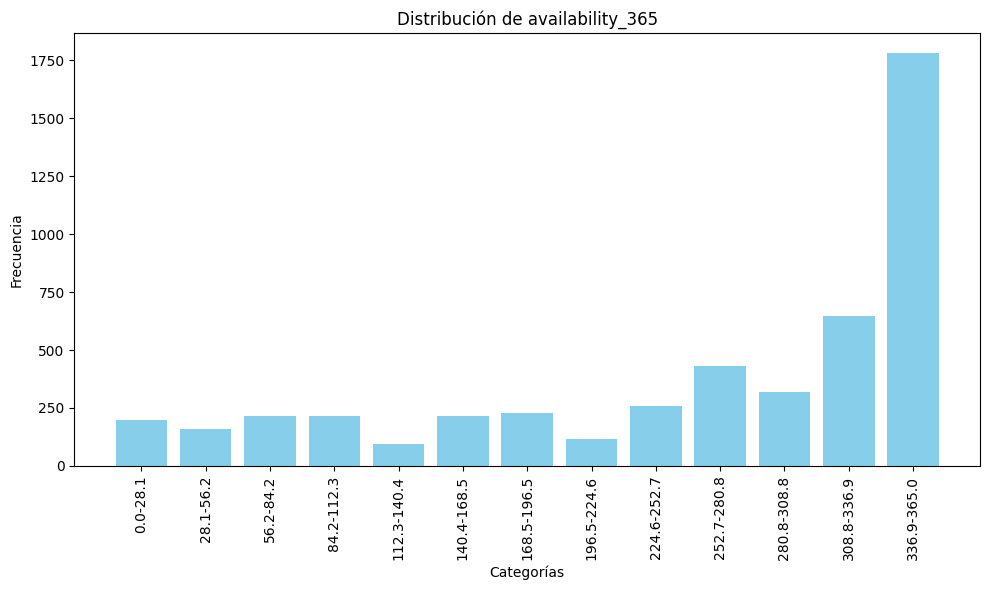

Gráfico creado para availability_365

Analizando variable: number_of_reviews

Frecuencias para number_of_reviews:
            var  freq  perc
0      1.0-19.2  1837  37.7
1     19.2-37.5   723  14.8
2     37.5-55.7   508  10.4
3     55.7-73.9   352   7.2
4     73.9-92.2   315   6.5
5    92.2-110.4   223   4.6
6   110.4-128.6   195   4.0
7   128.6-146.8   181   3.7
8   146.8-165.1   163   3.3
9   165.1-183.3   136   2.8
10  183.3-201.5    81   1.7
11  201.5-219.8    79   1.6
12  219.8-238.0    78   1.6


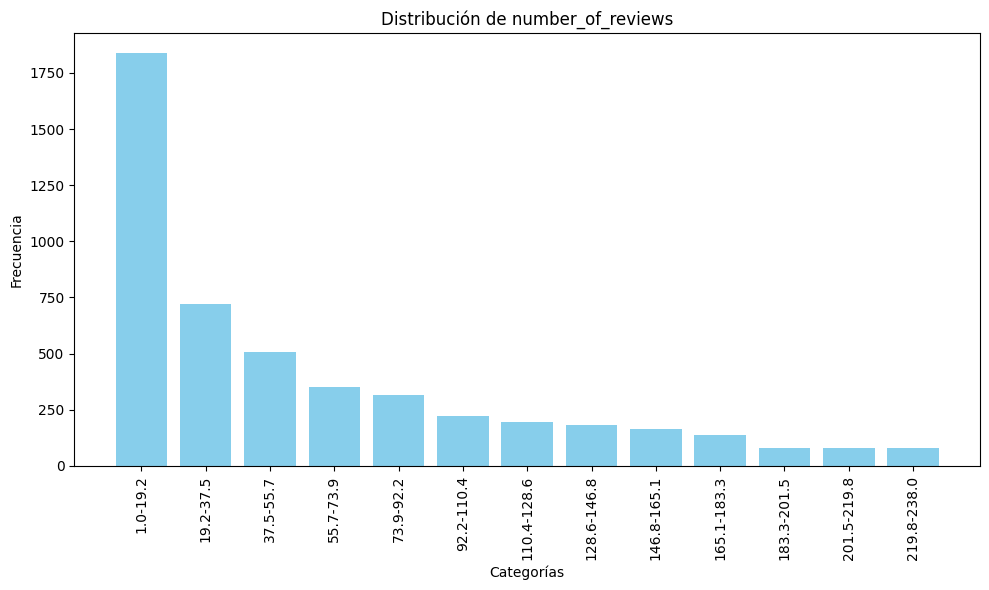

Gráfico creado para number_of_reviews

Analizando variable: review_scores_value

Frecuencias para review_scores_value:
        var  freq  perc
0   2.0-2.2     1   0.0
1   2.2-2.5     0   0.0
2   2.5-2.7     0   0.0
3   2.7-2.9     0   0.0
4   2.9-3.2     3   0.1
5   3.2-3.4     1   0.0
6   3.4-3.6     6   0.1
7   3.6-3.8    10   0.2
8   3.8-4.1    91   1.9
9   4.1-4.3   170   3.5
10  4.3-4.5   711  14.6
11  4.5-4.8  1799  36.9
12  4.8-5.0  2079  42.7


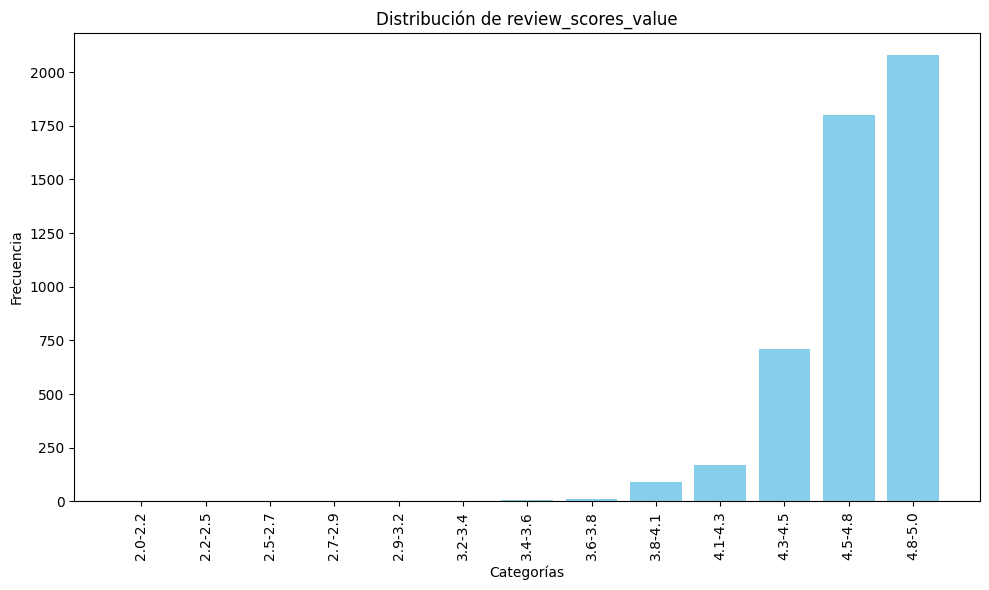

Gráfico creado para review_scores_value

Analizando variable: reviews_per_month

Frecuencias para reviews_per_month:
          var  freq  perc
0     0.0-0.9  1998  41.0
1     0.9-1.9  1140  23.4
2     1.9-2.8   790  16.2
3     2.8-3.7   398   8.2
4     3.7-4.6   254   5.2
5     4.6-5.6   152   3.1
6     5.6-6.5    89   1.8
7     6.5-7.4    36   0.7
8     7.4-8.3     9   0.2
9     8.3-9.3     2   0.0
10   9.3-10.2     1   0.0
11  10.2-11.1     1   0.0
12  11.1-12.0     1   0.0


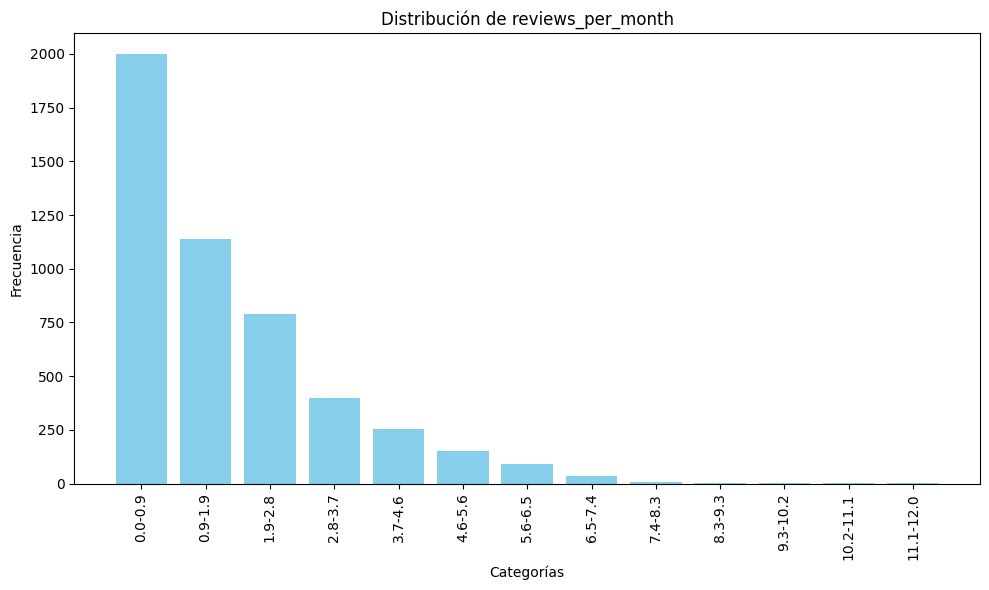

Gráfico creado para reviews_per_month

Analizando variable: bathrooms
Todos los valores en bathrooms son iguales: 1.0


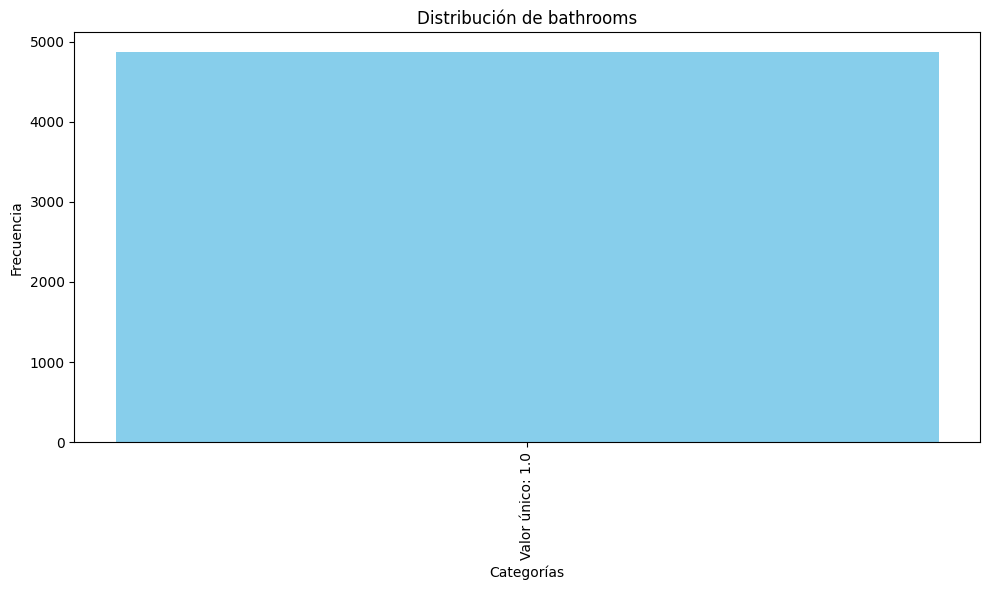

Gráfico creado para bathrooms


In [35]:
# funcion para aplicar la regla de Sturges
def aplicar_sturges(columna):
    # eliminacion valores nul 
    datos_limpios = df[columna].dropna()
    
    # número de categorías según Sturges
    n = len(datos_limpios)
    k = int(1 + 3.322 * np.log10(n))
    # al menos 2 categorías
    k = max(k, 2)
    # intervalos
    min_valor = datos_limpios.min()
    max_valor = datos_limpios.max()
    # Evitar división por cero si todos los valores son iguales
    if min_valor == max_valor:
        print(f"Todos los valores en {columna} son iguales: {min_valor}")
        df[f'{columna}_cat'] = f'Valor único: {min_valor}'
        frecuencias = pd.DataFrame({
            'var': [f'Valor único: {min_valor}'],
            'freq': [len(datos_limpios)],
            'perc': [100.0]
         })
        return frecuencias
    # intervalos (bins)
    intervalos = np.linspace(min_valor, max_valor, k + 1)
    #  etiquetas para las categorías
    etiquetas = [f'{intervalos[i]:.1f}-{intervalos[i+1]:.1f}' for i in range(k)]
     # Categorizar los datos
    categorias = pd.cut(datos_limpios, bins=intervalos, labels=etiquetas, include_lowest=True)
    df[f'{columna}_cat'] = categorias
    
    # Calculo de las frecuencias manulmente
    conteo = categorias.value_counts().sort_index()
      #  DataFrame de frecuencias 
    frecuencias = pd.DataFrame({
        'var': conteo.index,
        'freq': conteo.values,
        'perc': (conteo.values / len(categorias) * 100).round(1)
    })
    print(f"\nFrecuencias para {columna}:")
    print(frecuencias)
    
    return frecuencias

# variables y gráficos
for i, var in enumerate(variables_disponibles):
    print(f"\n{'='*50}\nAnalizando variable: {var}")
    try:
        #  variable estructyrada 
        frecuencias = aplicar_sturges(var)
        
        if frecuencias is not None:
            # gráfico de barras
            plt.figure(figsize=(10, 6))
            
            # las categorías y frecuencias
            categorias = frecuencias['var'].tolist()
            conteos = frecuencias['freq'].tolist()
            
            #  gráfico
            barras = plt.bar(range(len(categorias)), conteos, color='skyblue')
            plt.title(f'Distribución de {var}')
            plt.xlabel('Categorías')
            plt.ylabel('Frecuencia')
            plt.xticks(range(len(categorias)), categorias, rotation=90)  
            plt.tight_layout()
            plt.show()  
            print(f"Gráfico creado para {var}")
            
    except Exception as e:
        print(f"Error {var}: {str(e)}")

    

    